# Sound processing

http://pysoundfile.readthedocs.io/en/0.9.0/

```bash
$ pip install pysoundfile
Collecting pysoundfile
  Downloading PySoundFile-0.9.0.post1-py2.py3.cp26.cp27.cp32.cp33.cp34.cp35.cp36.pp27.pp32.pp33-none-macosx_10_5_x86_64.macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.whl (573kB)
    100% |████████████████████████████████| 573kB 1.4MB/s 
Requirement already satisfied: cffi>=0.6 in /Users/parrt/anaconda2/lib/python2.7/site-packages (from pysoundfile)
Requirement already satisfied: pycparser in /Users/parrt/anaconda2/lib/python2.7/site-packages (from cffi>=0.6->pysoundfile)
Installing collected packages: pysoundfile
Successfully installed pysoundfile-0.9.0.post1
```

Then try it out

```bash
$ python
Python 2.7.12 |Anaconda 4.2.0 (x86_64)| (default, Jul  2 2016, 17:43:17) 
[GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)] on darwin
Type "help", "copyright", "credits" or "license" for more information.
Anaconda is brought to you by Continuum Analytics.
Please check out: http://continuum.io/thanks and https://anaconda.org
>>> import soundfile as sf
>>> 
```

```bash
$ brew install mpg123
...
==> Downloading https://homebrew.bintray.com/bottles/mpg123-1.25.0.el_capitan.bottle.tar.gz
######################################################################## 100.0%
==> Pouring mpg123-1.25.0.el_capitan.bottle.tar.gz
==> Using the sandbox
🍺  /usr/local/Cellar/mpg123/1.25.0: 26 files, 765.2KB
```

```bash
$ mpg123 -w ahhh.wav ahhh.mp3 
High Performance MPEG 1.0/2.0/2.5 Audio Player for Layers 1, 2 and 3
	version 1.25.0; written and copyright by Michael Hipp and others
	free software (LGPL) without any warranty but with best wishes


Terminal control enabled, press 'h' for listing of keys and functions.

Playing MPEG stream 1 of 1: ahhh.mp3 ...

MPEG 1.0 L III cbr192 44100 j-s

Comment:  00000000 00000210 000009F5 000000000004FF7B 00000000 0002AB44 00000000 00000000 00000000 00000000 00000000 00000000

[0:07] Decoding of ahhh.mp3 finished.
```

In [24]:
import soundfile as sf

kiss, samplerate = sf.read('code/sound/Kiss.aiff')
print kiss # returns a numpy ndarray that you will become intimately familiar with

print "n =",len(kiss),", rate =",samplerate,"hz"

[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,  -6.10351562e-05
  -3.66210938e-04  -2.74658203e-04]
n = 123269  rate = 44100 hz


In [28]:
from IPython.display import Audio
Audio('code/sound/Kiss.aiff')


In [30]:
import numpy
fs = 44100 # sampling frequency
T = 1.5    # seconds
t = numpy.linspace(0, T, int(T*fs), endpoint=False) # time variable
x = numpy.sin(2*numpy.pi*440*t)                # pure sine wave at 440 Hz

# load a NumPy array
Audio(x, rate=fs)

In [38]:
import soundfile as sf

ahhh, samplerate = sf.read('code/sound/ahhh.wav')
print ahhh[:,0] # left channel
print ahhh[:,0] # right channel (stereo)

print "n =",len(ahhh),", rate =",samplerate,"hz"

[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
n = 330624 , rate = 44100 hz


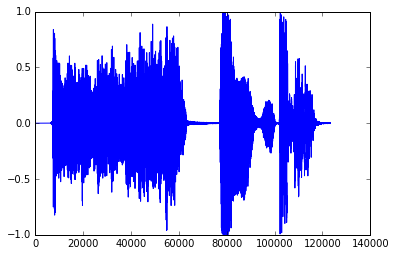

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(kiss);

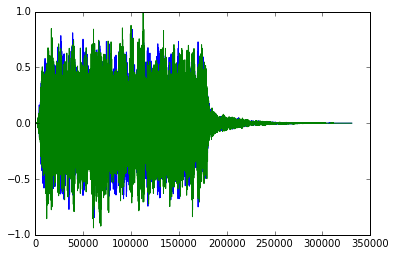

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ahhh);

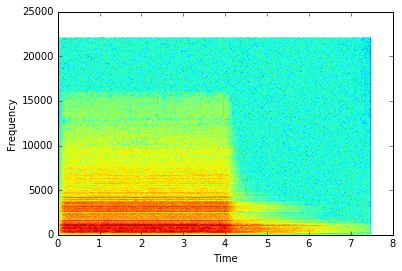

In [40]:
S, freqs, bins, im = plt.specgram(ahhh[:,0], NFFT=1024, Fs=fs, noverlap=512)

# Plot a spectrogram
plt.xlabel('Time')
plt.ylabel('Frequency')

In [26]:
sf.write('test.wav', ahhh, samplerate)